# Example Notebook
You can just add an example notebook like to the documentation.

The notebook can even contain math or plots. In this example, we will sample data from the following distribution:
$$\begin{align}
    Y &\sim \text{Bernoilli}(p)\\
    X|Y=0 &\sim N(\mu_0,\Sigma_0)\\
    X|Y=1 &\sim N(\mu_1,\Sigma_1)\\
\end{align}
$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Generate Data
Note how the headlines appear on the right in the table of content

### Parameters of the distribution

In [2]:
p = 0.3
mu_0 = np.asarray([-1,-1])
mu_1 = np.asarray([2,1])
sigma_0 = np.asarray([[2, 0.5], [0.5, 1]])
sigma_1 = np.asarray([[2, -0.8], [-0.8, 3]])

### Data
#### Sample $Y$

In [3]:
n = 500
y = np.random.rand(n) <= p

n1 = y.sum()
n0 = n - n1

#### Sample $X|Y=y$

In [4]:
x0 = np.random.multivariate_normal(mu_0, sigma_0, size=n0)
x1 = np.random.multivariate_normal(mu_1, sigma_1, size=n1)

x = np.zeros((n,2))
x[y==0] = x0
x[y==1] = x1

## Plot Data

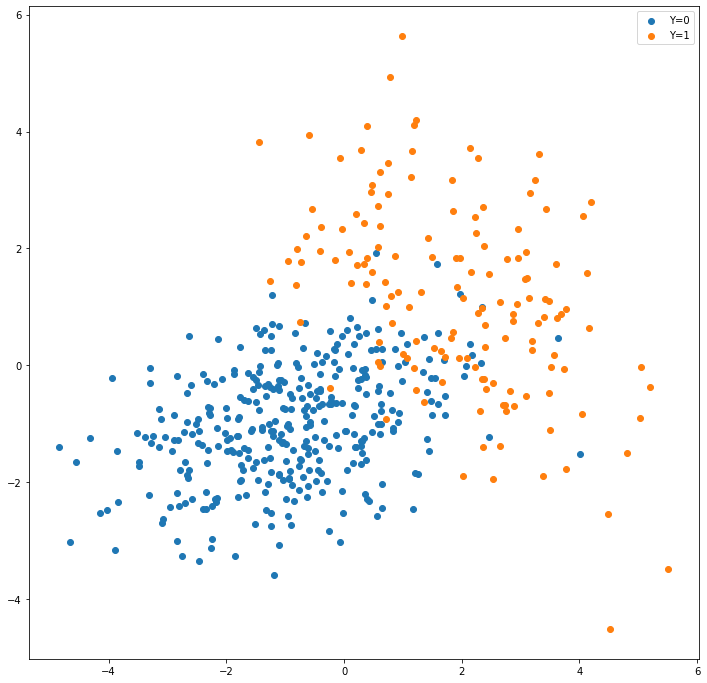

In [5]:
plt.figure(figsize=(12,12))

plt.scatter(x0[:,0],x0[:,1], label="Y=0")
plt.scatter(x1[:,0],x1[:,1], label="Y=1")

plt.legend()

## Train a logistic regression

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True)
lr.fit(x,y)

LogisticRegression()

### Plot decision line

In [7]:
c = lr.coef_[0]
b = lr.intercept_
m = -c[0] / c[1]
b = -b / c[1]

r0 = np.concatenate([[-1], -1 * m + b])
r1 = np.concatenate([[2], 2 * m + b])

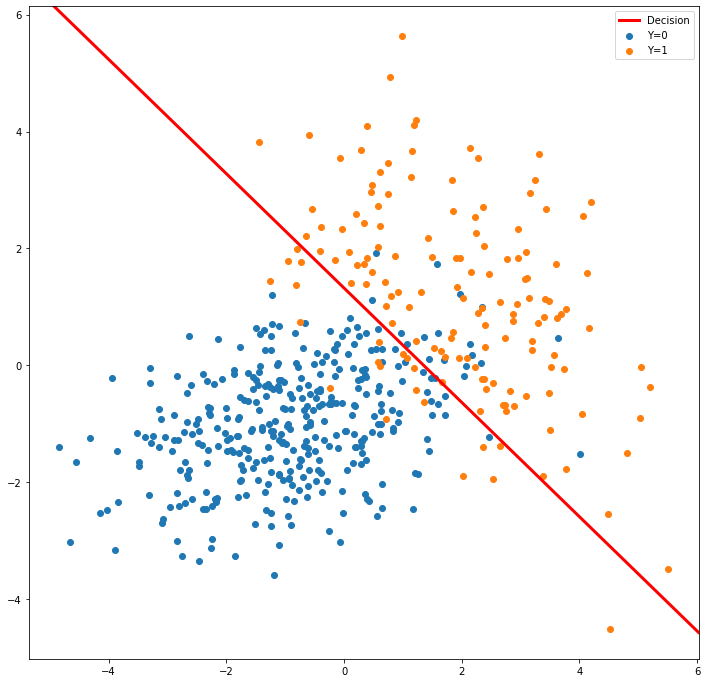

In [8]:
plt.figure(figsize=(12,12))

plt.scatter(x0[:,0],x0[:,1], label="Y=0")
plt.scatter(x1[:,0],x1[:,1], label="Y=1")

plt.axline(r0, r1, color="red", lw=3, label="Decision")
plt.legend()